# W24 CS 480/680 assignment 1 (coding part)


- Please save a copy of this notebook to avoid losing your changes.
- Debug your code and ensure that it can run before submission.
- Save the output of each cell. Failure to do so may result in your coding questions not being graded.
- Submit your completed version of this notebook.



## Implement Your Own Perceptron

In this question, you are asked to implement the **Perceptron** algorithm and test with a classification task on the adult dataset. Please refer to the [dataset webpage](https://archive.ics.uci.edu/dataset/53/iris) for details on the dataset, and consult the lecture slides and suggested readings for details on the Perceptron algorithm.

- `scikit-learn` or other off-the-shelf Perceptron libraries are not allowed to use.

- Please note that `class` column is the label of the dataset. The labellings have three possible values. So you need to implement a multi-class extension of Perceptron.

- Recording the accuracy on the training dataset when you train the Perceptron model on the training data, as an iteration. Repeat this step for 10 times.

- It is required that you split the dataset into training/testing datasets (80% and 20%, respectively), and we will deduct marks if you don't.

- You will get full marks for
    - Correctly split data into training set and testing set.
    - Correctly implement the perceptron algorithm.
    - Correctly handle multiple class.
    - A plot on training accuracy vs number of iterations, that relects the progress of the training.
    - Final reported accuracy (on the test dataset).

In [6]:
import urllib.request
import pandas as pd
# TODO: add any other package you need
import numpy as np

# Download the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
filename = 'iris.csv'
urllib.request.urlretrieve(url, filename) 

# Load the dataset into a Pandas dataframe
column_names = [
    'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'
]
data = pd.read_csv(filename, names=column_names)


In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Code for dataset splitting (training-testing):

In [62]:
# TODO: your implementation

data_randomize = data.sample(frac=1, random_state=42).reset_index(drop=True)
train_size = int(len(data_randomize)*0.8)
test_size = int(-len(data_randomize)*0.2)
# TODO: your implementation

train = data_randomize[:train_size]
test = data_randomize[test_size:]

In [125]:
train

,sepal_length,sepal_width,petal_length,petal_width,class
0,6.1,2.8,4.7,1.2,Iris-versicolor
1,5.7,3.8,1.7,0.3,Iris-setosa
2,7.7,2.6,6.9,2.3,Iris-virginica
3,6.0,2.9,4.5,1.5,Iris-versicolor
4,6.8,2.8,4.8,1.4,Iris-versicolor
...,...,...,...,...,...
115,6.9,3.1,5.4,2.1,Iris-virginica
116,5.9,3.0,4.2,1.5,Iris-versicolor
117,6.5,3.0,5.2,2.0,Iris-virginica
118,5.7,2.6,3.5,1.0,Iris-versicolor


In [63]:
test

,sepal_length,sepal_width,petal_length,petal_width,class
120,6.1,3.0,4.6,1.4,Iris-versicolor
121,4.5,2.3,1.3,0.3,Iris-setosa
122,6.6,2.9,4.6,1.3,Iris-versicolor
123,5.5,2.6,4.4,1.2,Iris-versicolor
124,5.3,3.7,1.5,0.2,Iris-setosa
125,5.6,3.0,4.1,1.3,Iris-versicolor
126,7.3,2.9,6.3,1.8,Iris-virginica
127,6.7,3.3,5.7,2.1,Iris-virginica
128,5.1,3.7,1.5,0.4,Iris-setosa
129,4.9,2.4,3.3,1.0,Iris-versicolor


In [64]:
test.shape

(30, 5)

Code for implemeting the Perceptron algorithm:
- You can either implement it as an class/object or implement the training function and the prediction function.

In [92]:
class Perceptron():
    def __init__(self, w, b):
        #padding trick
        self.w = w
        self.b = b

    def fit(self, X, y, iterations, w = None):
        if w is None:
            #init w vector
            w = np.zeros(X.shape[1]) + self.w
            #pad
            w = np.append(w, self.b)
        
        for i in range(iterations):
            for idx, j in enumerate(X):
                #pad x
                j = np.append(j, 1)
                # print(f'Weights n bias {w}')
                # print(f'score{(np.inner(j, w))}')
                if (y[idx]*(np.inner(j, w)) <= 0):
                    w = w + y[idx]*j
        self.w = w

    def predict(self, X, w = None):
        if w is None:
            w = self.w
        X = np.array([np.append(i, 1) for i in X])
        # print(X.shape)
        return np.dot(w, X.T)
        



In [93]:
for enumerate?

Init signature: enumerate(iterable, start=0)
Docstring:     
Return an enumerate object.

  iterable
    an object supporting iteration

The enumerate object yields pairs containing a count (from start, which
defaults to zero) and a value yielded by the iterable argument.

enumerate is useful for obtaining an indexed list:
    (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
Type:           type
Subclasses:     

In [94]:

X = np.array([[1,1,0,1,1 ],
             [0,0,1,1,0],
             [0,1,1,0,0],
             [1,0,0,1,0],
             [ 1,0,1,0,1],
             [1,0,1,1,0]])
y = np.array([1, -1, 1, -1, 1, -1])




In [95]:
per = Perceptron(0, 0)

In [96]:
per.fit(X, y, 1)

In [97]:
x_test = np.array([[0,0,0, 0, 0]])

In [98]:
per.predict(x_test)

array([0.])

In [99]:
vector = np.array([1, 2, 3])

# Define a 3x4 matrix
matrix = np.array([[4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

# Compute the dot product
result = np.dot(vector, matrix)

# Display the result
print("Resulting 1x4 vector:", result)

Resulting 1x4 vector: [56 62 68 74]


Code for implementing a wrapper function:
- Handling multi-class extension
- Feeding in data and call Perceptron training function
- Outputing multiple Perceptrons that are trained
# TODO: your implementation
#implement one vs all


            

In [112]:

class muticlass_perceptron():
    def __init__(self, func, data, class_col):
        self.func = func
        self.data = data
        self.class_col = class_col
        
        #class names
        self.classes = np.zeros(len(data[self.class_col].unique()), dtype= object)

    def fit(self, iterations):
        #list to store accuracy
        self.accuracy = np.zeros(iterations, dtype = object)
        #features
        X = np.array(self.data.drop(self.class_col, axis = 1))
        
        #init array of perceptrons for each class
        self.perceptrons = [np.zeros(X.shape[1]+1) for i in self.data[self.class_col].unique()]
        for j in range(iterations):
            for idx, i in enumerate(self.data[self.class_col].unique()):
                #do the OVR labelling
                y = np.where(self.data[self.class_col] == i, 1, -1)
                #init Perceptron w 0 as W and B
                self.per = self.func(0, 0)
                self.per.fit(X, y, 1, self.perceptrons[idx])
                self.perceptrons[idx] = self.per.w
                self.classes[idx] = i
            #getting predicted of training set
            y_pred = self.predict(X)
            y_acc = self.data[self.class_col]
            accuracy = sum([1 for pred, actual in zip(y_pred, y_acc) if pred == actual]) / len(y_acc)
            # print(f"y {y}")
            # print(f"y_ored {y_pred}")
            self.accuracy[j] = accuracy

    
    def predict(self, X):
        X = np.array(self.data.drop(self.class_col, axis = 1))
        y = np.zeros(X.shape[0], dtype= object)
        for count, i in enumerate(X):
            score = None
            for idx, j in enumerate(self.perceptrons):
                curr_score = self.func.predict(self.per, X = [i],w =  j)
                if score is None:
                    score = curr_score
                    y[count] = self.classes[idx]
                elif(curr_score > score):
                    score = curr_score
                    y[count] = self.classes[idx]
        return y


Code for testing and ploting:



In [113]:
test

,sepal_length,sepal_width,petal_length,petal_width,class
120,6.1,3.0,4.6,1.4,Iris-versicolor
121,4.5,2.3,1.3,0.3,Iris-setosa
122,6.6,2.9,4.6,1.3,Iris-versicolor
123,5.5,2.6,4.4,1.2,Iris-versicolor
124,5.3,3.7,1.5,0.2,Iris-setosa
125,5.6,3.0,4.1,1.3,Iris-versicolor
126,7.3,2.9,6.3,1.8,Iris-virginica
127,6.7,3.3,5.7,2.1,Iris-virginica
128,5.1,3.7,1.5,0.4,Iris-setosa
129,4.9,2.4,3.3,1.0,Iris-versicolor


In [114]:
train

,sepal_length,sepal_width,petal_length,petal_width,class
0,6.1,2.8,4.7,1.2,Iris-versicolor
1,5.7,3.8,1.7,0.3,Iris-setosa
2,7.7,2.6,6.9,2.3,Iris-virginica
3,6.0,2.9,4.5,1.5,Iris-versicolor
4,6.8,2.8,4.8,1.4,Iris-versicolor
...,...,...,...,...,...
115,6.9,3.1,5.4,2.1,Iris-virginica
116,5.9,3.0,4.2,1.5,Iris-versicolor
117,6.5,3.0,5.2,2.0,Iris-virginica
118,5.7,2.6,3.5,1.0,Iris-versicolor


In [122]:
# TODO: plot the accuracy against the number of iterations
# TODO: report the final accuracy

Percep = muticlass_perceptron(Perceptron, train, 'class')
Percep.fit(100)
Percep.predict(test)


array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iri

In [123]:
import matplotlib.pyplot as plt

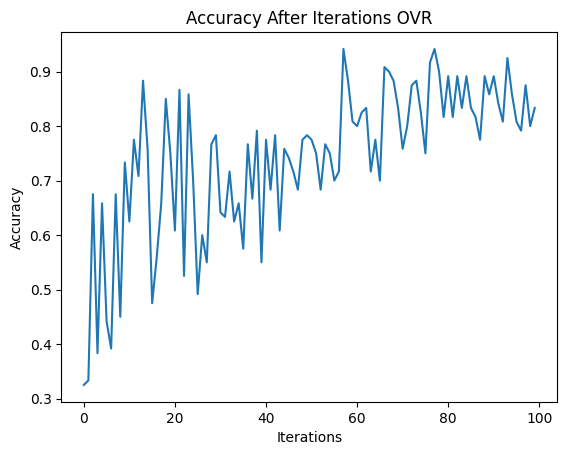

In [126]:
plt.plot(Percep.accuracy)
plt.title('Accuracy After Iterations OVR')
plt.ylabel("Accuracy")
plt.xlabel("Iterations");

In [33]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [36]:
X.shape()

TypeError: 'tuple' object is not callable